In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

#Comet Experiments 
from comet_ml import Experiment

#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

In [0]:
diamond = pd.read_csv("/dbfs/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv")

In [0]:
diamond

Out[3]:

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [0]:
diamond = diamond.drop(columns='Unnamed: 0')

In [0]:
diamond.describe()

Out[5]:

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Experiment Logging

In [0]:
experiment = Experiment(
    api_key="Insert COMET API Key here",
    project_name="azure-and-comet",
    workspace="mattblasa",
    log_code = False
)
#experiment.add_tag("Data Profile - AZDB")
experiment.add_tag("Azure-Databricks")
experiment.log_html_url("https://github.com/mattblasa/azure-comet", label='Github')

COMET ERROR: Failed to setup the std logger
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/mattblasa/azure-and-comet/6e45548ff6ac4592ba5e8ff26b92b376

# EDA

In [0]:
def log_SeaFigure(fig, fig_name):
    '''
    Logs the seaborn figure, first by using depreciated ax.fig, and runs ax.figure if an exception is raised. 
    
    Parameters: 
    fig (object) - seaborn figure
    fig_name (string) - the user defined name for seaborn figure in comet experiment 
    
    Returns: 
    Logs figure to comet experiment log, and prints the method used or an error message. 
    
    '''
    ax = fig
    try:
      experiment.log_figure(fig_name, ax.fig)
      print('Log Figure Successful using ax.fig')
    except: 
      experiment.log_figure(fig_name, ax.figure)
      print('Log Figure Successful using ax.figure')
    
    


The log_seaFigure method was added since seaborn plots aren't loaded into experiments as easily as matplotlib generated figures.

# Bivariate Statistics

Log Figure Successful using ax.figure

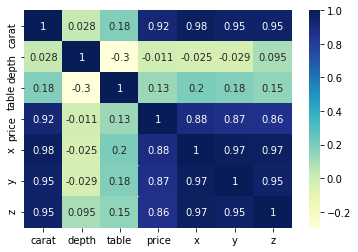

In [0]:
ax = sns.heatmap(diamond.corr(),annot=True ,cmap="YlGnBu")

log_SeaFigure(ax, "Diamond Correlation")

Log Figure Successful using ax.fig

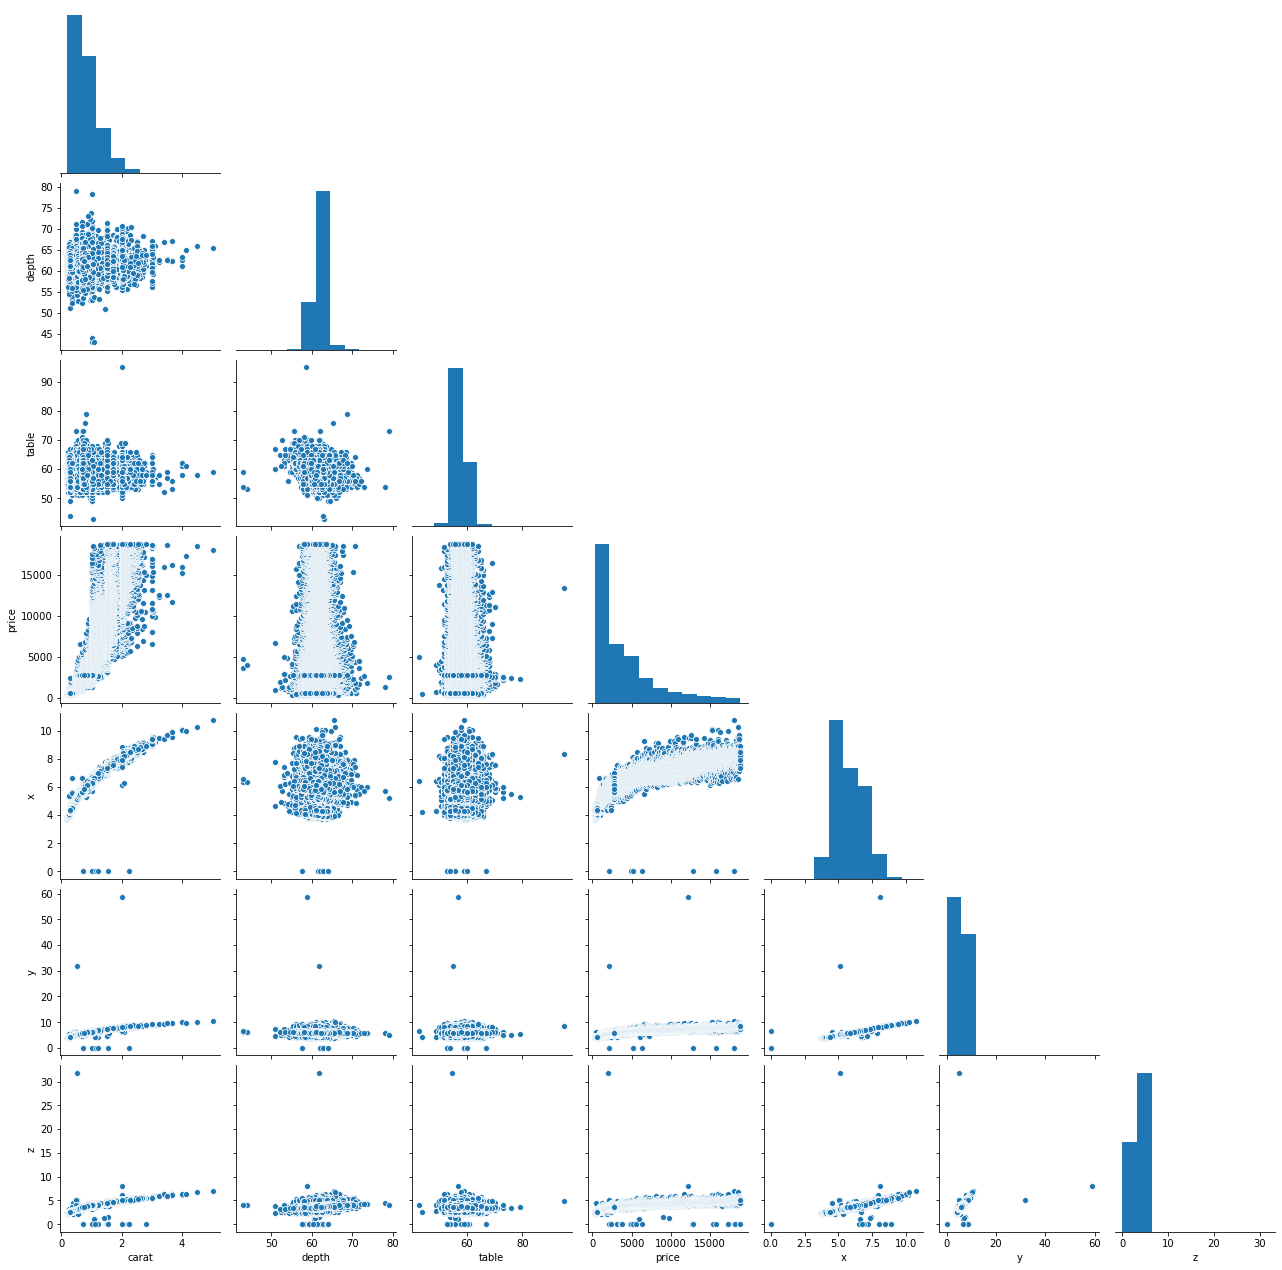

In [0]:
#You will need to sample if the data set is larger. 
pairplt = sns.pairplot(data=diamond, corner=True)
log_SeaFigure(pairplt, "Pairplot Diamond")

## Carat

Log Figure Successful using ax.fig

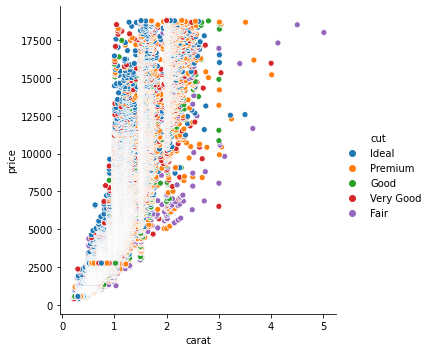

In [0]:
ax3 = sns.relplot(x='carat',y='price',hue='cut',data=diamond)
log_SeaFigure(ax3, "carat_price")

Out[11]:

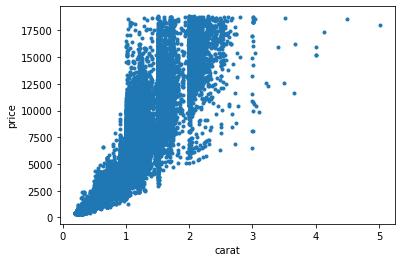

{'web': 'https://www.comet.ml/api/image/download?imageId=8ffdea9368fa4ccbb714dea4f5ab341d&experimentKey=6e45548ff6ac4592ba5e8ff26b92b376',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=8ffdea9368fa4ccbb714dea4f5ab341d&experimentKey=6e45548ff6ac4592ba5e8ff26b92b376',
 'imageId': '8ffdea9368fa4ccbb714dea4f5ab341d'}

In [0]:

plt.plot(diamond['carat'], diamond['price'], '.')
plt.xlabel('carat')
plt.ylabel('price')
experiment.log_figure(figure=plt)

## Cut

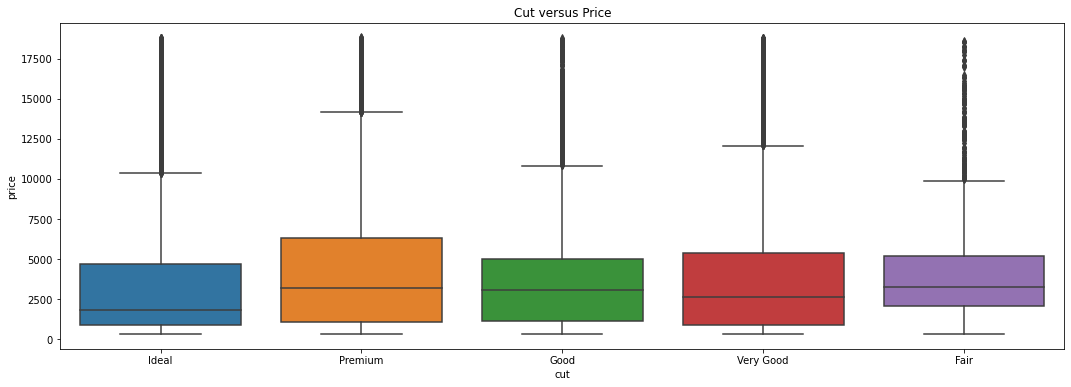

Out[12]:

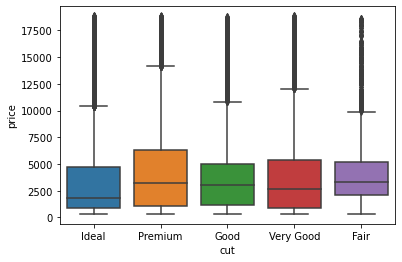

{'web': 'https://www.comet.ml/api/image/download?imageId=4702d62f85394eebb4d6d338c623d169&experimentKey=6e45548ff6ac4592ba5e8ff26b92b376',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=4702d62f85394eebb4d6d338c623d169&experimentKey=6e45548ff6ac4592ba5e8ff26b92b376',
 'imageId': '4702d62f85394eebb4d6d338c623d169'}

In [0]:
fig=plt.figure(figsize=(18,6))
sns.boxplot(x="cut",y="price",data=diamond)
plt.title("Cut versus Price")
plt.show()


ax3 = sns.boxplot(x="cut",y="price",data=diamond)
experiment.log_figure('cut_price', ax3.figure)

Out[13]:

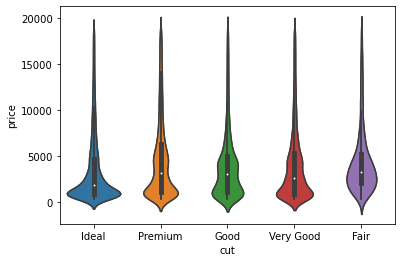

{'web': 'https://www.comet.ml/api/image/download?imageId=cc38548175f246299b7112308e68a3b4&experimentKey=6e45548ff6ac4592ba5e8ff26b92b376',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=cc38548175f246299b7112308e68a3b4&experimentKey=6e45548ff6ac4592ba5e8ff26b92b376',
 'imageId': 'cc38548175f246299b7112308e68a3b4'}

In [0]:
sns.violinplot(x="cut",y="price",data=diamond)

ax3 = sns.violinplot(x="cut",y="price",data=diamond)
experiment.log_figure('cut_price_violin', ax3.figure)

# Feature Engineering Section

In [0]:
diamond['cut'] = diamond['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4})
diamond['color'] = diamond['color'].replace({'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6})
diamond['clarity'] = diamond['clarity'].replace({'I1':0, 'SI1':1, 'SI2':2, 'VS1':3, 'VS2':4, 'VVS1':5, 'VVS2':6, 'IF':7})


In [0]:
diamond.drop(['x','y','z'], axis=1, inplace= True)

In [0]:
diamond

Out[16]:

,carat,cut,color,clarity,depth,table,price
0,0.23,4,5,2,61.5,55.0,326
1,0.21,3,5,1,59.8,61.0,326
2,0.23,1,5,3,56.9,65.0,327
3,0.29,3,1,4,62.4,58.0,334
4,0.31,1,0,2,63.3,58.0,335
...,...,...,...,...,...,...,...
53935,0.72,4,6,1,60.8,57.0,2757
53936,0.72,1,6,1,63.1,55.0,2757
53937,0.70,2,6,1,62.8,60.0,2757
53938,0.86,3,2,2,61.0,58.0,2757


In [0]:
spark_diamond = spark.createDataFrame(diamond)
display(diamond)

carat,cut,color,clarity,depth,table,price
0.23,4,5,2,61.5,55.0,326
0.21,3,5,1,59.8,61.0,326
0.23,1,5,3,56.9,65.0,327
0.29,3,1,4,62.4,58.0,334
0.31,1,0,2,63.3,58.0,335
0.24,2,0,6,62.8,57.0,336
0.24,2,1,5,62.3,57.0,336
0.26,2,2,1,61.9,55.0,337
0.22,0,5,4,65.1,61.0,337
0.23,2,2,3,59.4,61.0,338


In [0]:
display(spark_diamond)

carat,cut,color,clarity,depth,table,price
0.23,4,5,2,61.5,55.0,326
0.21,3,5,1,59.8,61.0,326
0.23,1,5,3,56.9,65.0,327
0.29,3,1,4,62.4,58.0,334
0.31,1,0,2,63.3,58.0,335
0.24,2,0,6,62.8,57.0,336
0.24,2,1,5,62.3,57.0,336
0.26,2,2,1,61.9,55.0,337
0.22,0,5,4,65.1,61.0,337
0.23,2,2,3,59.4,61.0,338


# Building Models Using Spark

In [0]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols = ['carat', 'cut', 'color', 'clarity', 'depth', 'table'], outputCol = 'features')
vdiamond_df = vectorAssembler.transform(spark_diamond)
vdiamond_df.take(1)



Out[19]: [Row(carat=0.23, cut=4, color=5, clarity=2, depth=61.5, table=55.0, price=326, features=DenseVector([0.23, 4.0, 5.0, 2.0, 61.5, 55.0]))]

In [0]:
display(vdiamond_df)

carat,cut,color,clarity,depth,table,price,features
0.23,4,5,2,61.5,55.0,326,"Map(vectorType -> dense, length -> 6, values -> List(0.23, 4.0, 5.0, 2.0, 61.5, 55.0))"
0.21,3,5,1,59.8,61.0,326,"Map(vectorType -> dense, length -> 6, values -> List(0.21, 3.0, 5.0, 1.0, 59.8, 61.0))"
0.23,1,5,3,56.9,65.0,327,"Map(vectorType -> dense, length -> 6, values -> List(0.23, 1.0, 5.0, 3.0, 56.9, 65.0))"
0.29,3,1,4,62.4,58.0,334,"Map(vectorType -> dense, length -> 6, values -> List(0.29, 3.0, 1.0, 4.0, 62.4, 58.0))"
0.31,1,0,2,63.3,58.0,335,"Map(vectorType -> dense, length -> 6, values -> List(0.31, 1.0, 0.0, 2.0, 63.3, 58.0))"
0.24,2,0,6,62.8,57.0,336,"Map(vectorType -> dense, length -> 6, values -> List(0.24, 2.0, 0.0, 6.0, 62.8, 57.0))"
0.24,2,1,5,62.3,57.0,336,"Map(vectorType -> dense, length -> 6, values -> List(0.24, 2.0, 1.0, 5.0, 62.3, 57.0))"
0.26,2,2,1,61.9,55.0,337,"Map(vectorType -> dense, length -> 6, values -> List(0.26, 2.0, 2.0, 1.0, 61.9, 55.0))"
0.22,0,5,4,65.1,61.0,337,"Map(vectorType -> dense, length -> 6, values -> List(0.22, 0.0, 5.0, 4.0, 65.1, 61.0))"
0.23,2,2,3,59.4,61.0,338,"Map(vectorType -> dense, length -> 6, values -> List(0.23, 2.0, 2.0, 3.0, 59.4, 61.0))"


In [0]:



vdiamond_df.show(3)



+-----+---+-----+-------+-----+-----+-----+--------------------+
carat|cut|color|clarity|depth|table|price| features|
+-----+---+-----+-------+-----+-----+-----+--------------------+
 0.23| 4| 5| 2| 61.5| 55.0| 326|[0.23,4.0,5.0,2.0...|
 0.21| 3| 5| 1| 59.8| 61.0| 326|[0.21,3.0,5.0,1.0...|
 0.23| 1| 5| 3| 56.9| 65.0| 327|[0.23,1.0,5.0,3.0...|
+-----+---+-----+-------+-----+-----+-----+--------------------+
only showing top 3 rows

In [0]:
display(vdiamond_df)

carat,cut,color,clarity,depth,table,price,features
0.23,4,5,2,61.5,55.0,326,"Map(vectorType -> dense, length -> 6, values -> List(0.23, 4.0, 5.0, 2.0, 61.5, 55.0))"
0.21,3,5,1,59.8,61.0,326,"Map(vectorType -> dense, length -> 6, values -> List(0.21, 3.0, 5.0, 1.0, 59.8, 61.0))"
0.23,1,5,3,56.9,65.0,327,"Map(vectorType -> dense, length -> 6, values -> List(0.23, 1.0, 5.0, 3.0, 56.9, 65.0))"
0.29,3,1,4,62.4,58.0,334,"Map(vectorType -> dense, length -> 6, values -> List(0.29, 3.0, 1.0, 4.0, 62.4, 58.0))"
0.31,1,0,2,63.3,58.0,335,"Map(vectorType -> dense, length -> 6, values -> List(0.31, 1.0, 0.0, 2.0, 63.3, 58.0))"
0.24,2,0,6,62.8,57.0,336,"Map(vectorType -> dense, length -> 6, values -> List(0.24, 2.0, 0.0, 6.0, 62.8, 57.0))"
0.24,2,1,5,62.3,57.0,336,"Map(vectorType -> dense, length -> 6, values -> List(0.24, 2.0, 1.0, 5.0, 62.3, 57.0))"
0.26,2,2,1,61.9,55.0,337,"Map(vectorType -> dense, length -> 6, values -> List(0.26, 2.0, 2.0, 1.0, 61.9, 55.0))"
0.22,0,5,4,65.1,61.0,337,"Map(vectorType -> dense, length -> 6, values -> List(0.22, 0.0, 5.0, 4.0, 65.1, 61.0))"
0.23,2,2,3,59.4,61.0,338,"Map(vectorType -> dense, length -> 6, values -> List(0.23, 2.0, 2.0, 3.0, 59.4, 61.0))"


In [0]:


splits = vdiamond_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]


In [0]:
def get_SparkMetric(labelCol, predCol, metricName, dfPrediction):
    '''
    Returns the a user-specified statistical metric for non-linear regression
    
    Parameters: 
    labelCol (str) - target column of a Spark Regression 
    predCol (str) - predicted values of regression 
    metricName (str) - metric used for model, such as RMSE, MAE, R2, MSE
    dfPrediction (obj) - transformed dataframe from test data 
    
    Returns: 
    Metric value for regression 
    
    '''
    evaluator = RegressionEvaluator(labelCol=labelCol, predictionCol=predCol, metricName=metricName)
    metric = evaluator.evaluate(dfPrediction)
    return metric 

In [0]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='price', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_df)


In [0]:
lr_trainingSummary = lr_model.summary
lr_r2 = lr_trainingSummary.r2
lr_mse = lr_trainingSummary.meanSquaredError
lr_rmse = lr_trainingSummary.rootMeanSquaredError
lr_mae = lr_trainingSummary.meanAbsoluteError

In [0]:
experiment.log_metric("LR_r2", lr_r2, step=0)
experiment.log_metric("LR_mse", lr_mse, step=0)
experiment.log_metric("LR_rmse", lr_rmse, step=0)
experiment.log_metric("LR_mae", lr_mae, step=0)

In [0]:

print("RMSE: %f" % lr_r2)
print("MSE = %s" % lr_mse)
print("r2: %f" % lr_rmse)
print("MAE = %s" % lr_rmse)

RMSE: 0.892180
MSE = 1713514.468267926
r2: 1309.012784
MAE = 1309.0127838443466

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'price')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)

In [0]:
get_SparkMetric("price", "prediction", "r2", dt_predictions)

Out[30]: 0.9329331468478268

In [0]:
dt_r2 = get_SparkMetric("price", "prediction", "r2", dt_predictions)
dt_rmse = get_SparkMetric("price", "prediction", "rmse", dt_predictions)
dt_mae = get_SparkMetric("price", "prediction", "mae", dt_predictions)
dt_mse = get_SparkMetric("price", "prediction", "mse", dt_predictions)

experiment.log_metric("DT_r2", dt_r2, step=0)
experiment.log_metric("DT_rmse", dt_rmse, step=0)
experiment.log_metric("DT_mae", dt_mae, step=0)
experiment.log_metric("DT_mse", dt_mse, step=0)

In [0]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'price', maxIter=10)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)


In [0]:
gbt_predictions.select('prediction', 'price', 'features').show(5)

+-----------------+-----+--------------------+
 prediction|price| features|
+-----------------+-----+--------------------+
552.6186703571818| 345|[0.2,3.0,5.0,2.0,...|
580.9909664219738| 404|[0.22,3.0,5.0,4.0...|
584.0619470959772| 338|[0.23,2.0,2.0,3.0...|
748.5350361427287| 415|[0.23,2.0,3.0,5.0...|
607.4453290990197| 402|[0.23,2.0,4.0,3.0...|
+-----------------+-----+--------------------+
only showing top 5 rows

In [0]:
gbt_r2 = get_SparkMetric("price", "prediction", "r2", gbt_predictions )
gbt_rmse = get_SparkMetric("price", "prediction", "rmse", gbt_predictions)
gbt_mae = get_SparkMetric("price", "prediction", "mae", gbt_predictions)
gbt_mse = get_SparkMetric("price", "prediction", "mse", gbt_predictions)

experiment.log_metric("GBT_r2", gbt_r2, step=0)
experiment.log_metric("GBT_rmse", gbt_rmse, step=0)
experiment.log_metric("GBT_mae", gbt_mae, step=0)
experiment.log_metric("GBT_mse", gbt_mse, step=0)

print("r2: %f" % gbt_r2)
print("MSE = %s" % gbt_mse)
print("RMSE: %f" % gbt_rmse)
print("MAE = %s" % gbt_rmse)

r2: 0.960199
MSE = 635576.4141066988
RMSE: 797.230465
MAE = 797.230464863642

In [0]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO: Data:
COMET INFO: display_summary_level : 1
COMET INFO: url : https://www.comet.ml/mattblasa/azure-and-comet/6e45548ff6ac4592ba5e8ff26b92b376
COMET INFO: Metrics:
COMET INFO: DT_mae : 588.079045633855
COMET INFO: DT_mse : 1070976.6983901956
COMET INFO: DT_r2 : 0.9329331468478268
COMET INFO: DT_rmse : 1034.8800405796778
COMET INFO: GBT_mae : 437.3443049393863
COMET INFO: GBT_mse : 635576.4141066988
COMET INFO: GBT_r2 : 0.9601988445724815
COMET INFO: GBT_rmse : 797.230464863642
COMET INFO: LR_mae : 892.1900775738447
COMET INFO: LR_mse : 1713514.468267926
COMET INFO: LR_r2 : 0.8921800493862976
COMET INFO: LR_rmse : 1309.0127838443466
COMET INFO: Uploads:
COMET INFO: environment details : 1
COMET INFO: figures : 6
COMET INFO: html : 1
COMET INFO: installed packages : 1
COMET INFO: os packages : 1
COMET INFO: ---------------------------
COMET INFO: Uploading metrics, params, and assets to Comet before program termination (may take several seconds)
COMET INFO: The Python SDK has 3600 seconds to finish before aborting...